# Empty project notebook

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
import matplotlib
import sqlite3
import json
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage


In [26]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

# Read the CSV file from the URL and save it as a DataFrame
df_housing = pd.read_csv(url, delimiter=',')


# Save the DataFrame to a CSV file in your project directory
df_housing.to_csv('../src/movies', index=False)


print("CSV files has been downloaded and saved as a DataFrame.")

CSV files has been downloaded and saved as a DataFrame.


In [27]:
df_housing.head()   

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [29]:
df_housing.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [30]:
df_data = df_housing[['Latitude', 'Longitude', 'MedInc']]

In [31]:
training_df, testing_df = train_test_split(df_data, test_size=0.2, random_state=42)

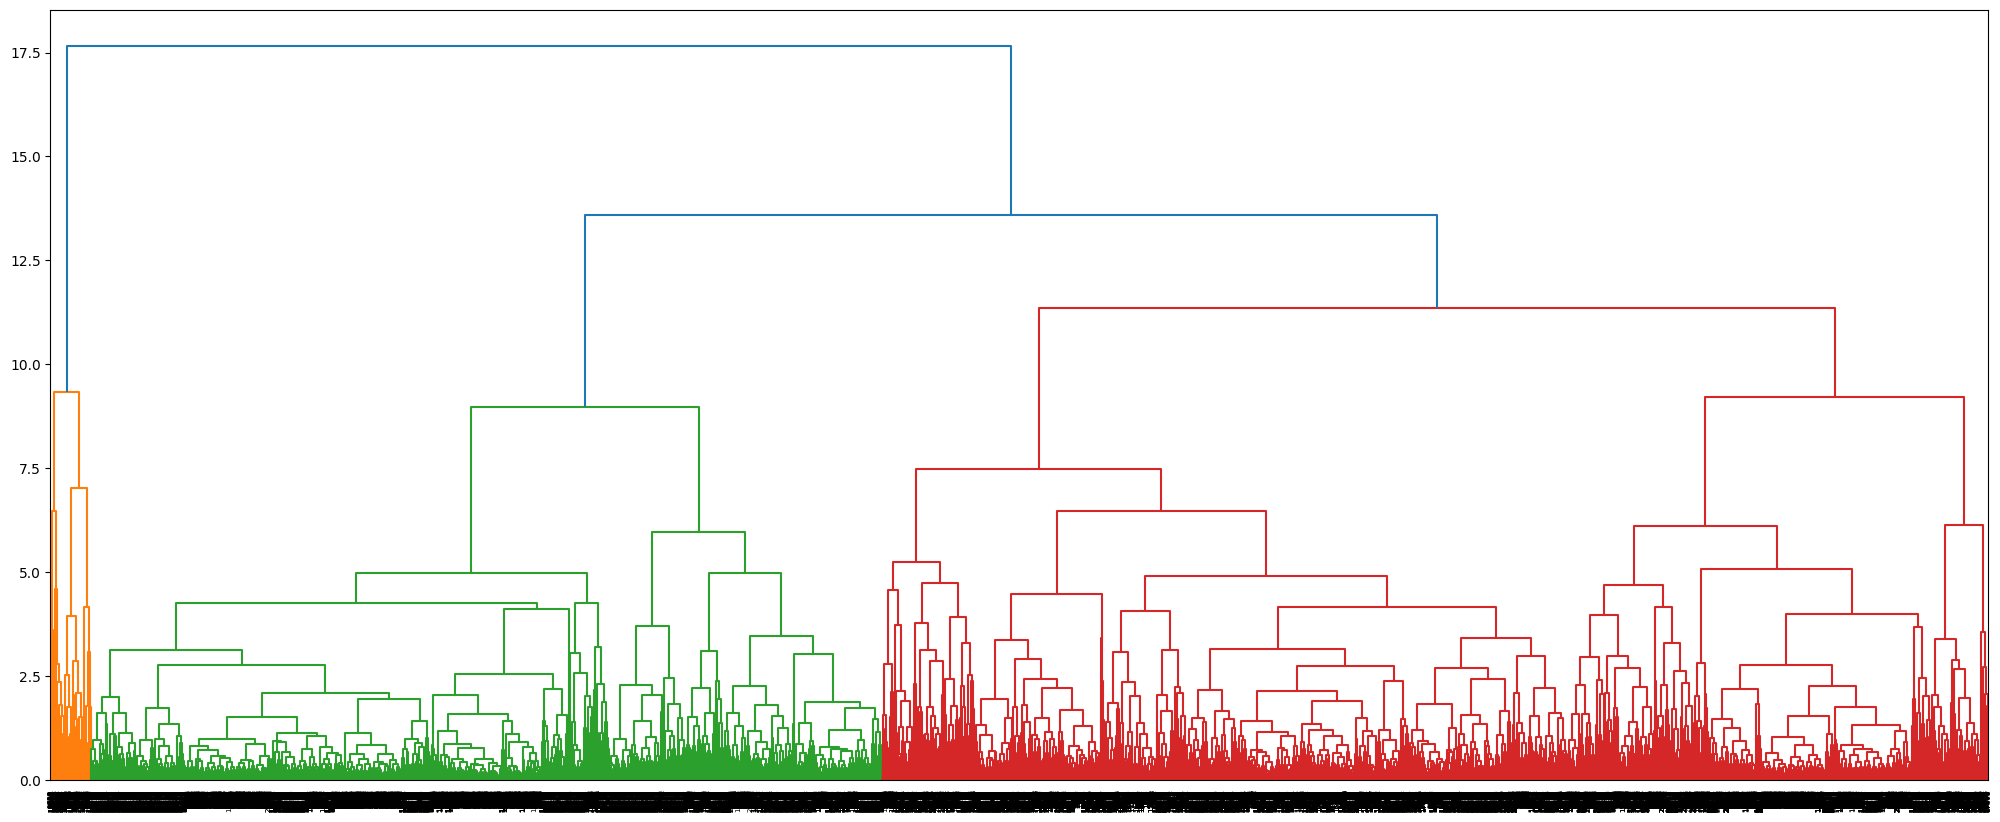

In [42]:
Z = linkage(df_data, method = "complete")

plt.figure(figsize=(25, 10))
dendrogram(Z, )
plt.show()



In [43]:
Z

array([[1.63280000e+04, 1.63310000e+04, 0.00000000e+00, 2.00000000e+00],
       [4.56900000e+03, 4.57100000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.29100000e+03, 8.85200000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.12720000e+04, 4.12740000e+04, 1.13636990e+01, 1.17760000e+04],
       [4.12730000e+04, 4.12760000e+04, 1.35814497e+01, 2.02070000e+04],
       [4.12750000e+04, 4.12770000e+04, 1.76471325e+01, 2.06400000e+04]],
      shape=(20639, 4))

In [44]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 6, criterion='maxclust')

In [45]:
df_data['cluster'] = clusters

/var/folders/v_/2k7y736n7x103htcsntppd6r0000gn/T/ipykernel_64129/2418597160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['cluster'] = clusters


In [47]:
print(df_data['cluster'].value_counts())

cluster
3    8431
4    7303
5    3877
6     596
2     279
1     154
Name: count, dtype: int64


In [48]:
print(df_data)

       Latitude  Longitude  MedInc  cluster
0         37.88    -122.23  8.3252        6
1         37.86    -122.22  8.3014        6
2         37.85    -122.24  7.2574        6
3         37.85    -122.25  5.6431        4
4         37.85    -122.25  3.8462        4
...         ...        ...     ...      ...
20635     39.48    -121.09  1.5603        4
20636     39.49    -121.21  2.5568        4
20637     39.43    -121.22  1.7000        4
20638     39.43    -121.32  1.8672        4
20639     39.37    -121.24  2.3886        4

[20640 rows x 4 columns]


In [15]:
#so use a model to predict the cluster of each data point- maybe a tree based model
# so input data is latitude, longitude, and median income
# output is the cluster number



In [49]:
train_df, test_df = train_test_split(df_data, test_size=0.2, random_state=42)

In [50]:
X_train = train_df[['Latitude', 'Longitude', 'MedInc']]
y_train = train_df['cluster']

X_test = test_df[['Latitude', 'Longitude', 'MedInc']]
y_test = test_df['cluster']

In [51]:
from sklearn.ensemble import RandomForestClassifier


In [52]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [53]:
y_pred = model.predict(X_test)
y_pred

array([5, 5, 4, ..., 1, 4, 5], shape=(4128,), dtype=int32)

In [54]:
accuracy_score(y_test, y_pred)

0.9922480620155039

In [55]:
scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
scores

array([0.99243112, 0.98698153, 0.99152029, 0.99121744, 0.98758328])

In [56]:
print(np.mean(scores))

0.9899467345454172
